            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun
time                                                                      
2023-01-01  13.3  10.0  15.7   0.9   0.0  225.0  27.7  67.3  1010.9  192.0
2023-01-02   9.9   6.0  13.1   2.8   0.0  220.0  19.8  58.7  1013.4    0.0
2023-01-03   5.0   2.3   6.6   3.4   0.0  217.0  13.7  35.3  1025.0  252.0
2023-01-04   9.4   6.3  11.6  12.3   0.0  220.0  28.4  63.0  1009.6    0.0
2023-01-05   7.5   3.3  10.0   1.4   0.0  272.0  21.6  64.8  1013.9   96.0
Mean Squared Error (MSE) für 7-tägigen gleitenden Durchschnitt: 17.85


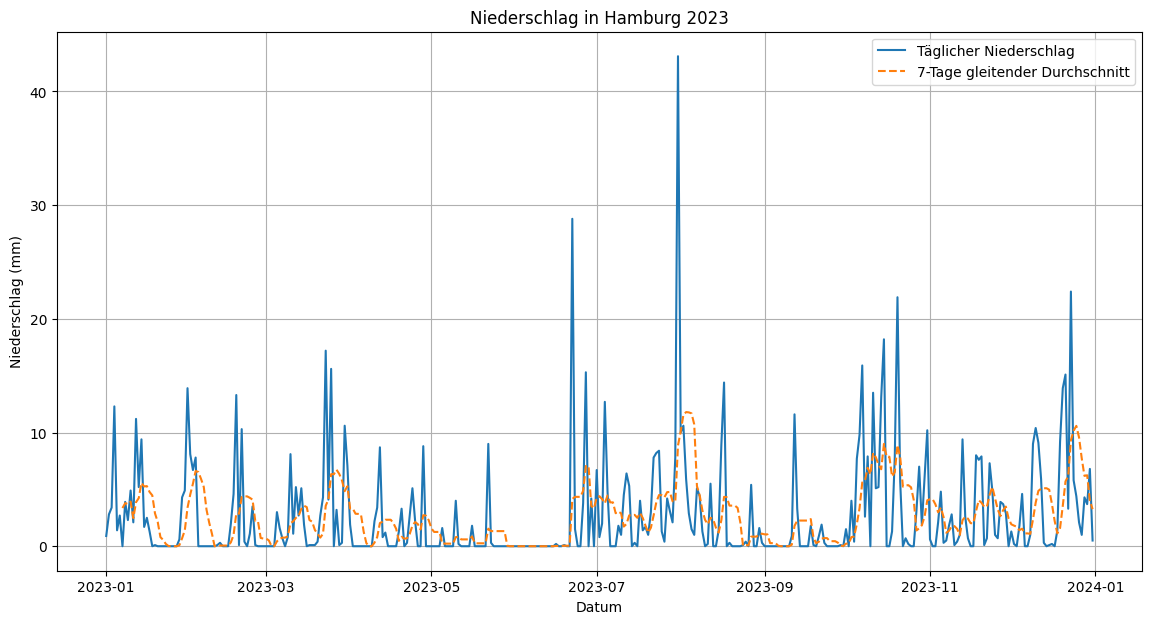

In [10]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum
start = pd.to_datetime('2023-01-01')
end = pd.to_datetime('2023-12-31')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Zeige einen ersten Blick auf die Daten
print(data.head())

# Berechne den gleitenden Durchschnitt (z.B. über ein Fenster von 7 Tagen)
data['prcp_ma_7'] = data['prcp'].rolling(window=7).mean()

# Berechne den MSE zwischen den tatsächlichen und den gleitenden Durchschnittswerten für den Niederschlag
# Entferne NaN-Werte, die durch das Rolling Average entstehen
mse = mean_squared_error(data['prcp'][6:], data['prcp_ma_7'][6:])  # 6: um NaN am Anfang zu überspringen
print(f'Mean Squared Error (MSE) für 7-tägigen gleitenden Durchschnitt: {mse:.2f}')

# Plot der ursprünglichen Daten und des gleitenden Durchschnitts
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['prcp'], label='Täglicher Niederschlag')
plt.plot(data.index, data['prcp_ma_7'], label='7-Tage gleitender Durchschnitt', linestyle='--')
plt.title('Niederschlag in Hamburg 2023')
plt.xlabel('Datum')
plt.ylabel('Niederschlag (mm)')
plt.legend()
plt.grid(True)
plt.show()


            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun
time                                                                      
1950-01-01  -0.4  -2.9   0.7   2.0   0.0  181.0  11.9   NaN  1030.5  294.0
1950-01-02   4.2  -0.3   5.4   3.7   0.0  256.0  25.2   NaN  1011.5    0.0
1950-01-03   4.3   2.8   6.0   0.0   0.0  298.0  20.9   NaN  1006.4  306.0
1950-01-04  -1.4  -3.9   3.0   0.1   0.0  328.0   7.9   NaN  1009.1    6.0
1950-01-05  -2.8  -4.5  -1.9  12.6   0.0  120.0  15.5   NaN  1005.6    0.0
Mean Squared Error (MSE) für 7-tägigen gleitenden Durchschnitt: 14.81


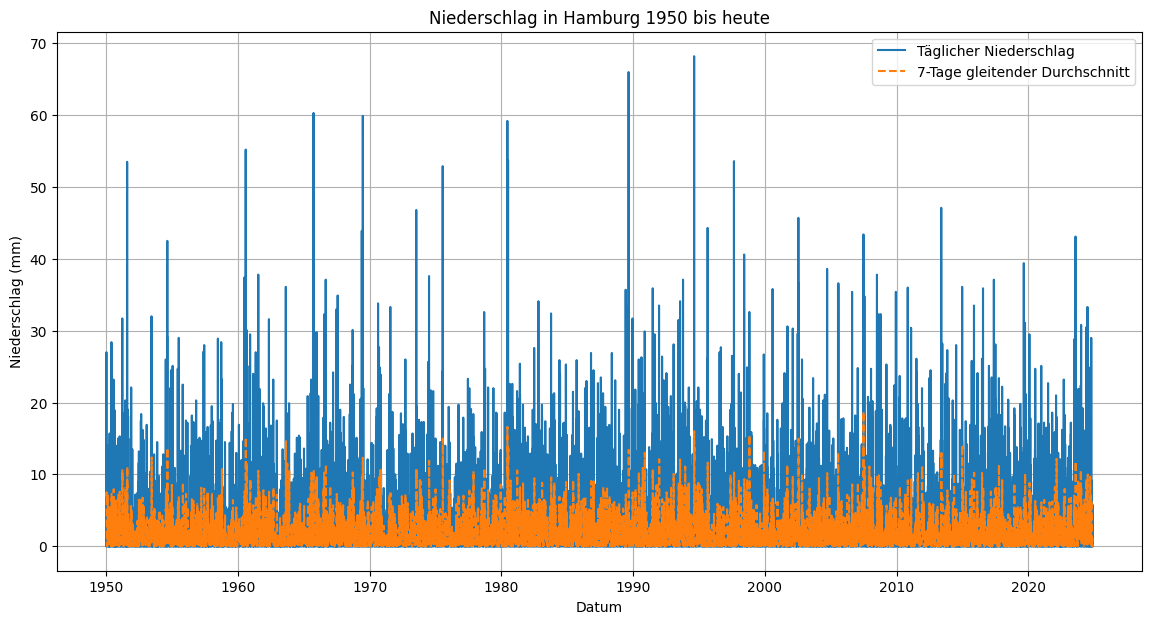

In [11]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Zeige einen ersten Blick auf die Daten
print(data.head())

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Berechne den gleitenden Durchschnitt (z.B. über ein Fenster von 7 Tagen)
    data['prcp_ma_7'] = data['prcp'].rolling(window=7).mean()

    # Berechne den MSE zwischen den tatsächlichen und den gleitenden Durchschnittswerten für den Niederschlag
    # Entferne NaN-Werte, die durch das Rolling Average entstehen
    mse = mean_squared_error(data['prcp'][6:], data['prcp_ma_7'][6:])
    print(f'Mean Squared Error (MSE) für 7-tägigen gleitenden Durchschnitt: {mse:.2f}')

    # Plot der ursprünglichen Daten und des gleitenden Durchschnitts
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['prcp'], label='Täglicher Niederschlag')
    plt.plot(data.index, data['prcp_ma_7'], label='7-Tage gleitender Durchschnitt', linestyle='--')
    plt.title('Niederschlag in Hamburg 1950 bis heute')
    plt.xlabel('Datum')
    plt.ylabel('Niederschlag (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()



Mean Squared Error (MSE) für 5-jähriger gleitender Durchschnitt: 21.77


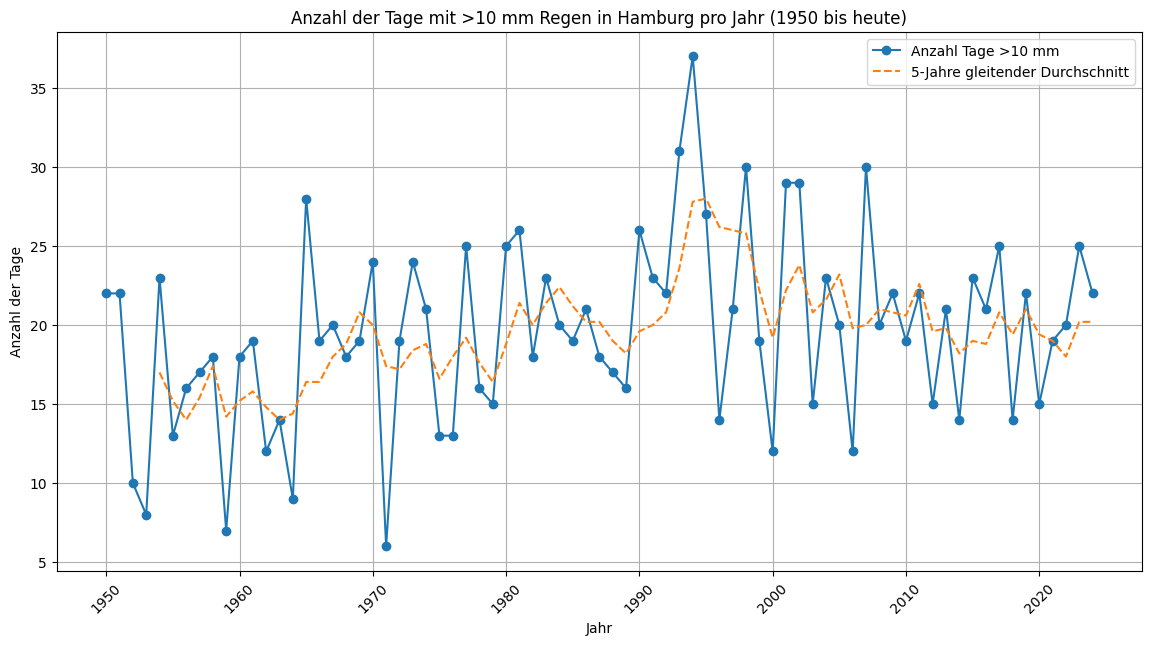

In [12]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Finde Tage mit mehr als 10 mm Niederschlag
    data['heavy_rain'] = data['prcp'] > 10

    # Zähle die Anzahl der Tage pro Jahr
    heavy_rain_days_per_year = data.resample('Y').sum()['heavy_rain']

    # Berechne einen gleitenden Durchschnitt (z.B. über 5 Jahre)
    heavy_rain_days_per_year_ma = heavy_rain_days_per_year.rolling(window=5).mean()

    # Berechne das Mean Squared Error (MSE)
    # Da der gleitende Durchschnitt nicht auf den ersten paar Jahren existiert, überspringen wir die ersten paar Jahre
    mse = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_per_year_ma[4:])
    print(f'Mean Squared Error (MSE) für 5-jähriger gleitender Durchschnitt: {mse:.2f}')

    # Plot der Anzahl der schweren Regentage pro Jahr
    plt.figure(figsize=(14, 7))
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year, marker='o', linestyle='-', label='Anzahl Tage >10 mm')
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year_ma, linestyle='--', label='5-Jahre gleitender Durchschnitt')
    plt.title('Anzahl der Tage mit >10 mm Regen in Hamburg pro Jahr (1950 bis heute)')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der Tage')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    

Mean Squared Error (MSE) für 5-jähriger gleitender Durchschnitt: 21.77


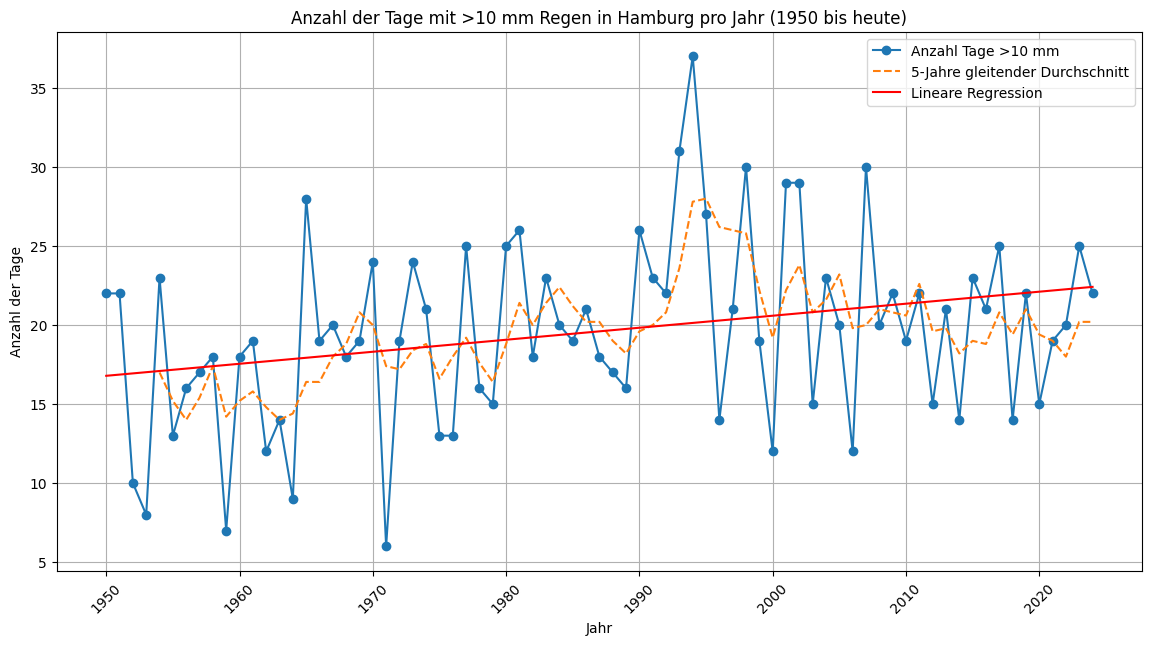

In [13]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Finde Tage mit mehr als 10 mm Niederschlag
    data['heavy_rain'] = data['prcp'] > 10

    # Zähle die Anzahl der Tage pro Jahr
    heavy_rain_days_per_year = data.resample('Y').sum()['heavy_rain']

    # Berechne einen gleitenden Durchschnitt (z.B. über 5 Jahre)
    heavy_rain_days_per_year_ma = heavy_rain_days_per_year.rolling(window=5).mean()

    # Berechne das Mean Squared Error (MSE)
    mse = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_per_year_ma[4:])
    print(f'Mean Squared Error (MSE) für 5-jähriger gleitender Durchschnitt: {mse:.2f}')

    # Vorbereitung der Daten für lineare Regression
    years = heavy_rain_days_per_year.index.year.values.reshape(-1, 1)
    values = heavy_rain_days_per_year.values

    # Lineares Regressionsmodell erstellen und anpassen
    model = LinearRegression()
    model.fit(years, values)

    # Vorhersagen für die Regression
    trend_line = model.predict(years)

    # Plot der Anzahl der schweren Regentage pro Jahr mit Trends
    plt.figure(figsize=(14, 7))
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year, marker='o', linestyle='-', label='Anzahl Tage >10 mm')
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year_ma, linestyle='--', label='5-Jahre gleitender Durchschnitt')
    plt.plot(heavy_rain_days_per_year.index.year, trend_line, linestyle='-', color='red', label='Lineare Regression')
    plt.title('Anzahl der Tage mit >10 mm Regen in Hamburg pro Jahr (1950 bis heute)')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der Tage')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    

Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt: 21.77
Mean Squared Error (MSE) für die lineare Regression: 31.45


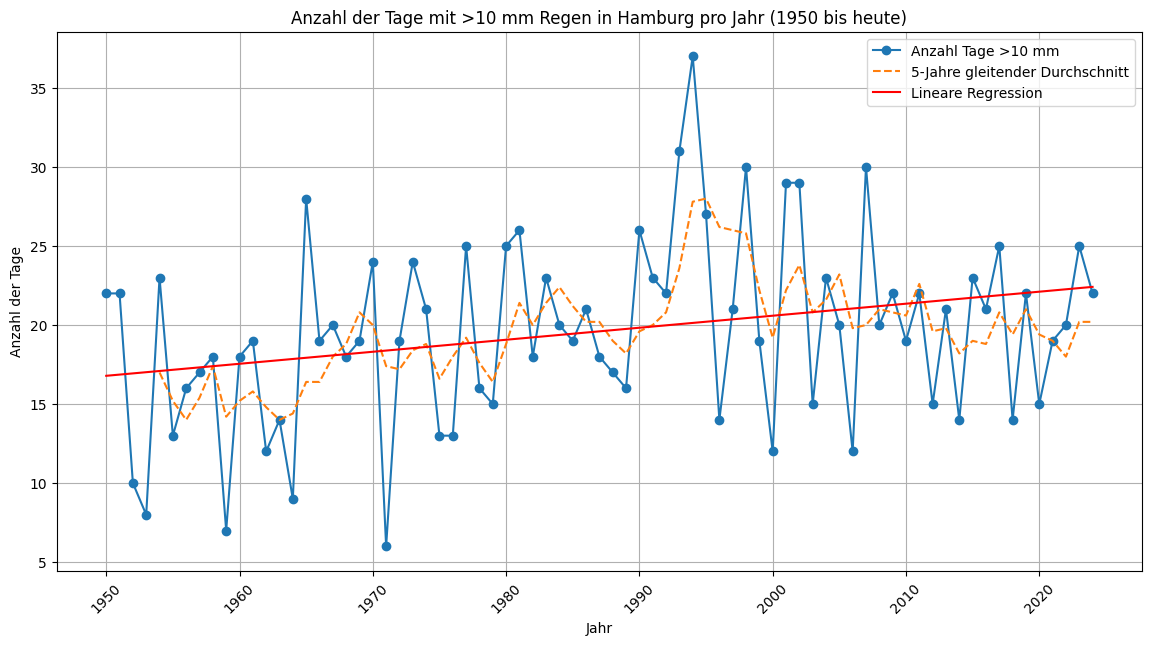

In [14]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Finde Tage mit mehr als 10 mm Niederschlag
    data['heavy_rain'] = data['prcp'] > 10

    # Zähle die Anzahl der Tage pro Jahr
    heavy_rain_days_per_year = data.resample('Y').sum()['heavy_rain']
    
    # Berechne einen gleitenden Durchschnitt (z.B. über 5 Jahre)
    heavy_rain_days_per_year_ma = heavy_rain_days_per_year.rolling(window=5).mean()

    # Berechne das Mean Squared Error (MSE) für den gleitenden Durchschnitt
    mse_ma = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_per_year_ma[4:])
    print(f'Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt: {mse_ma:.2f}')

    # Vorbereitung der Daten für lineare Regression
    years = heavy_rain_days_per_year.index.year.values.reshape(-1, 1)
    values = heavy_rain_days_per_year.values

    # Lineares Regressionsmodell erstellen und anpassen
    model = LinearRegression()
    model.fit(years, values)

    # Vorhersagen für die Regression
    trend_line = model.predict(years)

    # Berechne das Mean Squared Error (MSE) für das lineare Regressionsmodell
    mse_regression = mean_squared_error(values, trend_line)
    print(f'Mean Squared Error (MSE) für die lineare Regression: {mse_regression:.2f}')

    # Plot der Anzahl der schweren Regentage pro Jahr mit Trends
    plt.figure(figsize=(14, 7))
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year, marker='o', linestyle='-', label='Anzahl Tage >10 mm')
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year_ma, linestyle='--', label='5-Jahre gleitender Durchschnitt')
    plt.plot(heavy_rain_days_per_year.index.year, trend_line, linestyle='-', color='red', label='Lineare Regression')
    plt.title('Anzahl der Tage mit >10 mm Regen in Hamburg pro Jahr (1950 bis heute)')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der Tage')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt: 21.77
Mean Squared Error (MSE) für den exponenziellen gleitenden Durchschnitt: 16.38
Mean Squared Error (MSE) für den gewichteten Durchschnitt: 17.35
Mean Squared Error (MSE) für die lineare Regression: 31.45


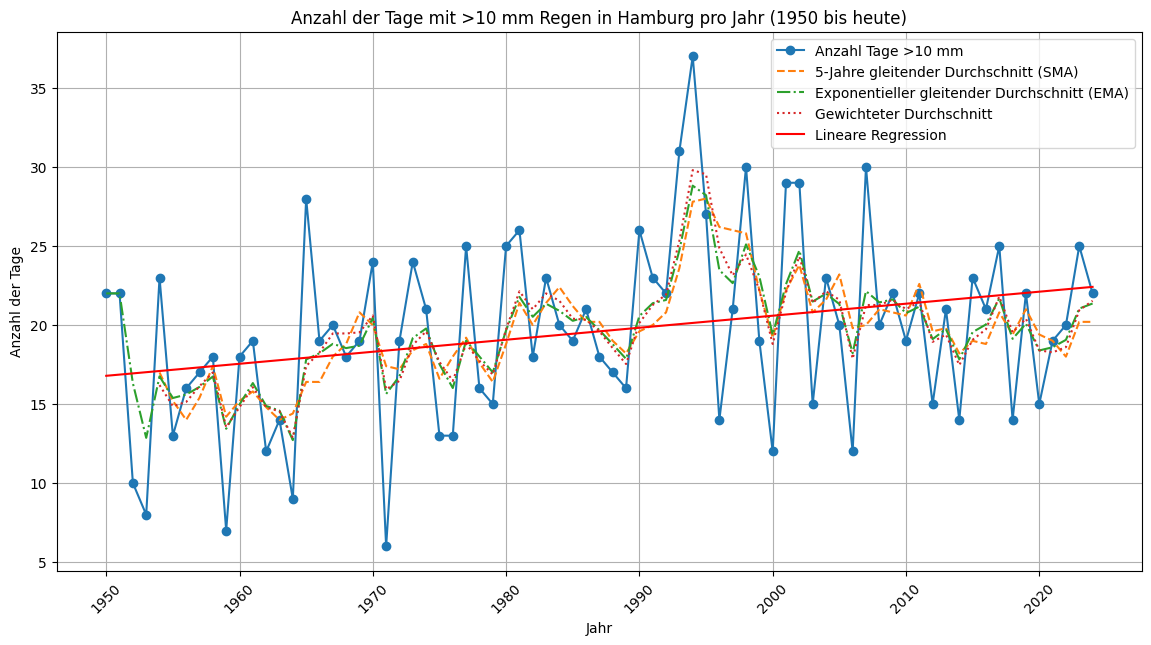

In [ ]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Finde Tage mit mehr als 10 mm Niederschlag
    data['heavy_rain'] = data['prcp'] > 10

    # Zähle die Anzahl der Tage pro Jahr
    heavy_rain_days_per_year = data.resample('Y').sum()['heavy_rain']
    
    # 1. Einfacher gleitender Durchschnitt (SMA) (durchschnitt der letzten Datenpunkte)
    heavy_rain_days_per_year_ma = heavy_rain_days_per_year.rolling(window=5).mean()

    # 2. Exponentieller gleitender Durchschnitt (EMA) (neuste Daten stärker gewichtet)
    heavy_rain_days_per_year_ema = heavy_rain_days_per_year.ewm(span=5).mean()
    
    # 3. Berechnung des gewichteten Durchschnitts (neue Dtaen stärker gewichtet)
    weights = np.arange(1, 6)  # Beispielsweise die letzten 5 Jahre
    heavy_rain_days_weighted_average = heavy_rain_days_per_year.rolling(window=5).apply(lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), raw=True)

    # Berechne das Mean Squared Error (MSE) für den gleitenden Durchschnitt
    mse_ma = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_per_year_ma[4:])
    print(f'Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt: {mse_ma:.2f}')

    # Berechne das Mean Squared Error (MSE) für den EMA
    mse_ema = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_per_year_ema[4:])
    print(f'Mean Squared Error (MSE) für den exponenziellen gleitenden Durchschnitt: {mse_ema:.2f}')

    # Berechne das Mean Squared Error (MSE) für den gewichteten Durchschnitt
    mse_weighted = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_weighted_average[4:])
    print(f'Mean Squared Error (MSE) für den gewichteten Durchschnitt: {mse_weighted:.2f}')

    # Vorbereitung der Daten für lineare Regression
    years = heavy_rain_days_per_year.index.year.values.reshape(-1, 1)
    values = heavy_rain_days_per_year.values

    # Lineares Regressionsmodell erstellen und anpassen
    model = LinearRegression()
    model.fit(years, values)

    # Vorhersagen für die Regression
    trend_line = model.predict(years)

    # Berechne das Mean Squared Error (MSE) für das lineare Regressionsmodell
    mse_regression = mean_squared_error(values, trend_line)
    print(f'Mean Squared Error (MSE) für die lineare Regression: {mse_regression:.2f}')

    # Plot der Anzahl der schweren Regentage pro Jahr mit Trends
    plt.figure(figsize=(14, 7))
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year, marker='o', linestyle='-', label='Anzahl Tage >10 mm')
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year_ma, linestyle='--', label='5-Jahre gleitender Durchschnitt (SMA)')
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year_ema, linestyle='-.', label='Exponentieller gleitender Durchschnitt (EMA)')
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_weighted_average, linestyle=':', label='Gewichteter Durchschnitt')
    plt.plot(heavy_rain_days_per_year.index.year, trend_line, linestyle='-', color='red', label='Lineare Regression')
    plt.title('Anzahl der Tage mit >10 mm Regen in Hamburg pro Jahr (1950 bis heute)')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der Tage')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()



Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt (prozentual): 2708.96
Mean Squared Error (MSE) für den exponentiellen gleitenden Durchschnitt (prozentual): 2003.28
Mean Squared Error (MSE) für den gewichteten Durchschnitt (prozentual): 2170.99
Mean Squared Error (MSE) für die lineare Regression (prozentual): 3530.94


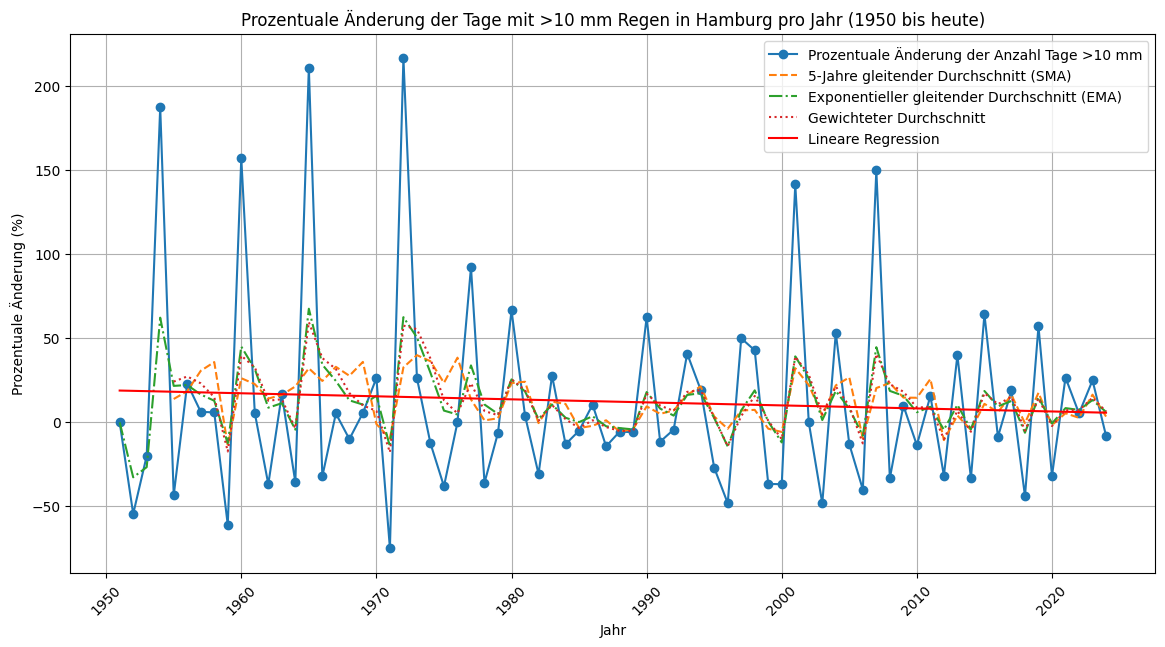

In [17]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Finde Tage mit mehr als 10 mm Niederschlag
    data['heavy_rain'] = data['prcp'] > 10

    # Zähle die Anzahl der Tage pro Jahr
    heavy_rain_days_per_year = data.resample('Y').sum()['heavy_rain']

    # Berechne die prozentuale jährliche Änderung
    percentage_change = heavy_rain_days_per_year.pct_change() * 100

    # Rollende Mittelwerte der prozentualen Änderungen
    percentage_change_ma = percentage_change.rolling(window=5).mean()
    percentage_change_ema = percentage_change.ewm(span=5).mean()
    weights = np.arange(1, 6)
    percentage_change_weighted = percentage_change.rolling(window=5).apply(
        lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), raw=True
    )

    # Berechne das Mean Squared Error (MSE) für die Methoden
    mse_ma = mean_squared_error(percentage_change[5:], percentage_change_ma[5:])
    mse_ema = mean_squared_error(percentage_change[5:], percentage_change_ema[5:])
    mse_weighted = mean_squared_error(percentage_change[5:], percentage_change_weighted[5:])

    print(f'Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt (prozentual): {mse_ma:.2f}')
    print(f'Mean Squared Error (MSE) für den exponentiellen gleitenden Durchschnitt (prozentual): {mse_ema:.2f}')
    print(f'Mean Squared Error (MSE) für den gewichteten Durchschnitt (prozentual): {mse_weighted:.2f}')

    # Vorbereitung der Daten für lineare Regression
    years = heavy_rain_days_per_year.index.year.values[1:].reshape(-1, 1) # Überspringe das erste Jahr wegen pct_change()
    values = percentage_change.values[1:]  # Überspringe den ersten Wert (NaN von pct_change())

    # Lineares Regressionsmodell erstellen und anpassen
    model = LinearRegression()
    model.fit(years, values)

    # Vorhersagen für die Regression
    trend_line = model.predict(years)

    # Berechne das Mean Squared Error (MSE) für das lineare Regressionsmodell
    mse_regression = mean_squared_error(values, trend_line)
    print(f'Mean Squared Error (MSE) für die lineare Regression (prozentual): {mse_regression:.2f}')

    # Plot der prozentualen Änderung der schweren Regentage pro Jahr mit Trends
    plt.figure(figsize=(14, 7))
    plt.plot(heavy_rain_days_per_year.index.year[1:], percentage_change[1:], marker='o', linestyle='-',
             label='Prozentuale Änderung der Anzahl Tage >10 mm')
    plt.plot(heavy_rain_days_per_year.index.year[1:], percentage_change_ma[1:], linestyle='--',
             label='5-Jahre gleitender Durchschnitt (SMA)')
    plt.plot(heavy_rain_days_per_year.index.year[1:], percentage_change_ema[1:], linestyle='-.',
             label='Exponentieller gleitender Durchschnitt (EMA)')
    plt.plot(heavy_rain_days_per_year.index.year[1:], percentage_change_weighted[1:], linestyle=':',
             label='Gewichteter Durchschnitt')
    plt.plot(heavy_rain_days_per_year.index.year[1:], trend_line, linestyle='-', color='red',
             label='Lineare Regression')
    plt.title('Prozentuale Änderung der Tage mit >10 mm Regen in Hamburg pro Jahr (1950 bis heute)')
    plt.xlabel('Jahr')
    plt.ylabel('Prozentuale Änderung (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt: 3.70
Mean Squared Error (MSE) für den exponenziellen gleitenden Durchschnitt: 2.51
Mean Squared Error (MSE) für den gewichteten Durchschnitt: 2.73
Mean Squared Error (MSE) für die lineare Regression: 4.41


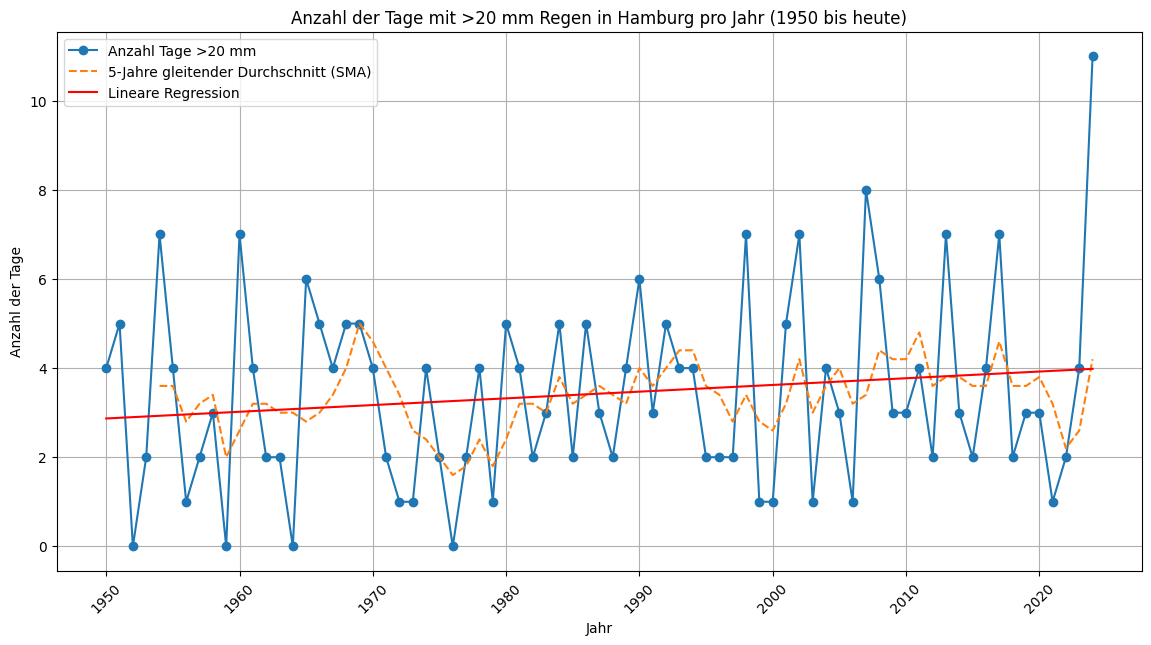

In [5]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Finde Tage mit mehr als 20 mm Niederschlag
    data['heavy_rain'] = data['prcp'] > 20

    # Zähle die Anzahl der Tage pro Jahr
    heavy_rain_days_per_year = data.resample('Y').sum()['heavy_rain']
    
    # 1. Einfacher gleitender Durchschnitt (SMA) (durchschnitt der letzten Datenpunkte)
    heavy_rain_days_per_year_ma = heavy_rain_days_per_year.rolling(window=5).mean()

    # 2. Exponentieller gleitender Durchschnitt (EMA) (neuste Daten stärker gewichtet)
    heavy_rain_days_per_year_ema = heavy_rain_days_per_year.ewm(span=5).mean()
    
    # 3. Berechnung des gewichteten Durchschnitts (neue Dtaen stärker gewichtet)
    weights = np.arange(1, 6)  # Beispielsweise die letzten 5 Jahre
    heavy_rain_days_weighted_average = heavy_rain_days_per_year.rolling(window=5).apply(lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), raw=True)

    # Berechne das Mean Squared Error (MSE) für den gleitenden Durchschnitt
    mse_ma = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_per_year_ma[4:])
    print(f'Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt: {mse_ma:.2f}')

    # Berechne das Mean Squared Error (MSE) für den EMA
    mse_ema = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_per_year_ema[4:])
    print(f'Mean Squared Error (MSE) für den exponenziellen gleitenden Durchschnitt: {mse_ema:.2f}')

    # Berechne das Mean Squared Error (MSE) für den gewichteten Durchschnitt
    mse_weighted = mean_squared_error(heavy_rain_days_per_year[4:], heavy_rain_days_weighted_average[4:])
    print(f'Mean Squared Error (MSE) für den gewichteten Durchschnitt: {mse_weighted:.2f}')

    # Vorbereitung der Daten für lineare Regression
    years = heavy_rain_days_per_year.index.year.values.reshape(-1, 1)
    values = heavy_rain_days_per_year.values

    # Lineares Regressionsmodell erstellen und anpassen
    model = LinearRegression()
    model.fit(years, values)

    # Vorhersagen für die Regression
    trend_line = model.predict(years)

    # Berechne das Mean Squared Error (MSE) für das lineare Regressionsmodell
    mse_regression = mean_squared_error(values, trend_line)
    print(f'Mean Squared Error (MSE) für die lineare Regression: {mse_regression:.2f}')

    # Plot der Anzahl der schweren Regentage pro Jahr mit Trends
    plt.figure(figsize=(14, 7))
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year, marker='o', linestyle='-', label='Anzahl Tage >20 mm')
    plt.plot(heavy_rain_days_per_year.index.year, heavy_rain_days_per_year_ma, linestyle='--', label='5-Jahre gleitender Durchschnitt (SMA)')
    plt.plot(heavy_rain_days_per_year.index.year, trend_line, linestyle='-', color='red', label='Lineare Regression')
    plt.title('Anzahl der Tage mit >20 mm Regen in Hamburg pro Jahr (1950 bis heute)')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der Tage')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


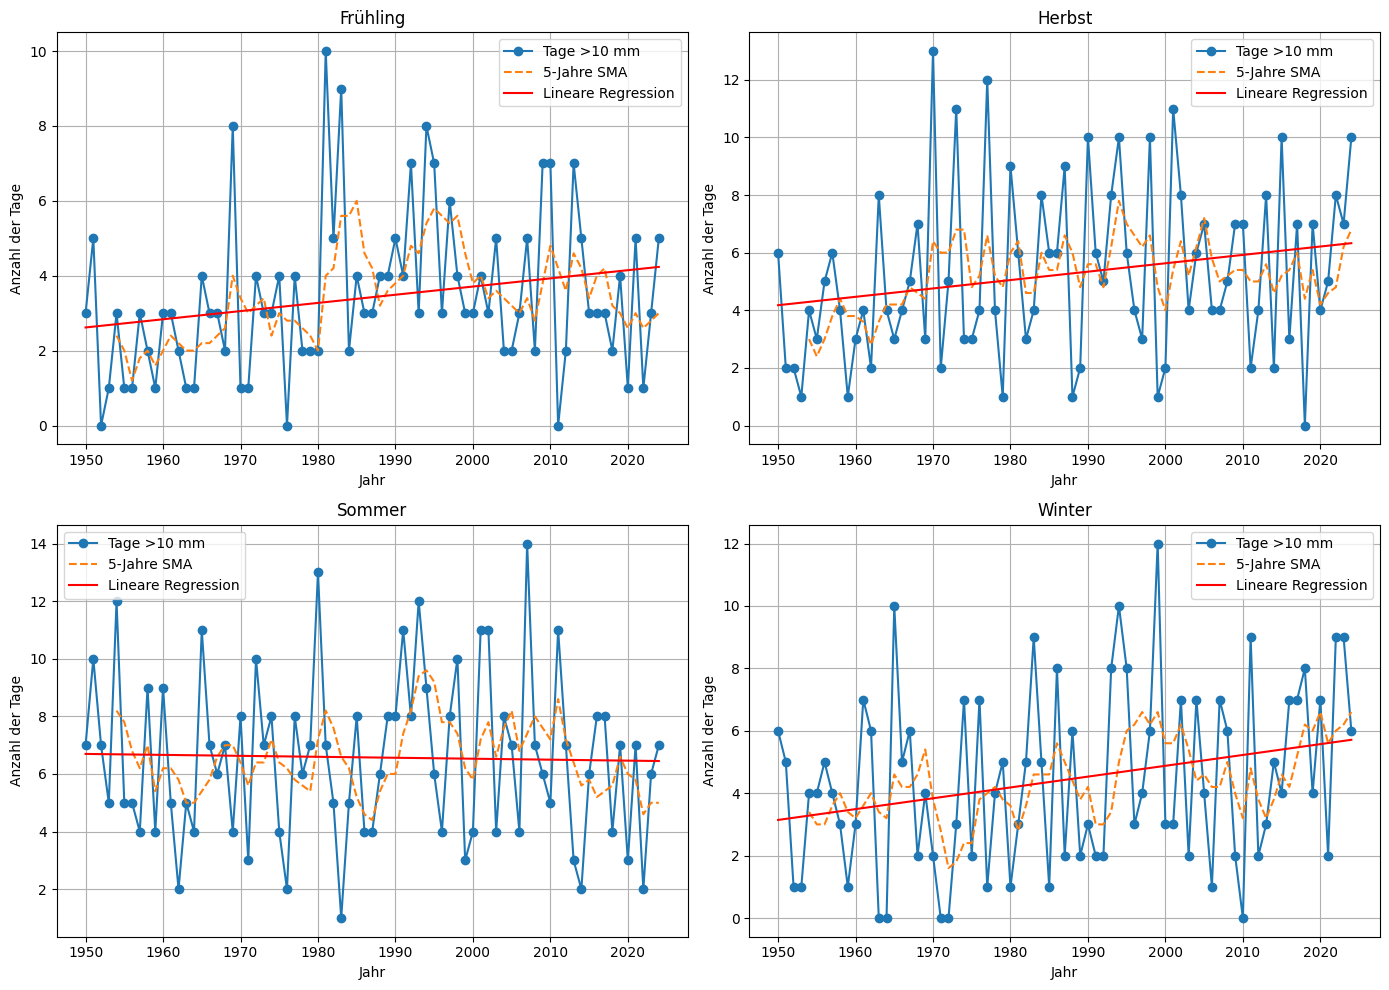

In [4]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Finde Tage mit mehr als 10 mm Niederschlag
    data['heavy_rain'] = data['prcp'] > 10
    
    # Definiere die Jahreszeiten
    data['season'] = data.index.month % 12 // 3 + 1  # 1=Winter, 2=Frühling, 3=Sommer, 4=Herbst
    # Optional: explizite Benennungen
    season_names = {1: 'Winter', 2: 'Frühling', 3: 'Sommer', 4: 'Herbst'}
    data['season_name'] = data['season'].map(season_names)

    # Aggregiere die Anzahl der Tage pro Jahr und Saison
    heavy_rain_days_per_season = data.groupby([data.index.year, 'season_name']).sum()['heavy_rain'].unstack()

    # Plot für jede Jahreszeit separat
    plt.figure(figsize=(14, 10))
    
    for i, season in enumerate(heavy_rain_days_per_season.columns, start=1):
        ax = plt.subplot(2, 2, i)
        
        # Original und gleitende Durchschnitte
        heavy_rain_season = heavy_rain_days_per_season[season]
        heavy_rain_season_ma = heavy_rain_season.rolling(window=5).mean()
        heavy_rain_season_ema = heavy_rain_season.ewm(span=5).mean()
        
        # Gewichteter Durchschnitt
        weights = np.arange(1, 6)
        heavy_rain_season_weighted_avg = heavy_rain_season.rolling(window=5).apply(
            lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), 
            raw=True
        )

        # Lineare Regression
        years = heavy_rain_days_per_season.index.get_level_values(0).values.reshape(-1, 1)
        values = heavy_rain_season.values

        model = LinearRegression()
        model.fit(years, values)
        trend_line = model.predict(years)
        
        # Plot
        ax.plot(heavy_rain_days_per_season.index.get_level_values(0), heavy_rain_season, marker='o', linestyle='-', label='Tage >10 mm')
        ax.plot(heavy_rain_days_per_season.index.get_level_values(0), heavy_rain_season_ma, linestyle='--', label='5-Jahre SMA')
        ax.plot(heavy_rain_days_per_season.index.get_level_values(0), trend_line, linestyle='-', color='red', label='Lineare Regression')
        ax.set_title(f'{season}')
        ax.set_xlabel('Jahr')
        ax.set_ylabel('Anzahl der Tage')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

MSE für Frühling: 4.21
MSE für Herbst: 8.33
MSE für Sommer: 7.97
MSE für Winter: 7.41


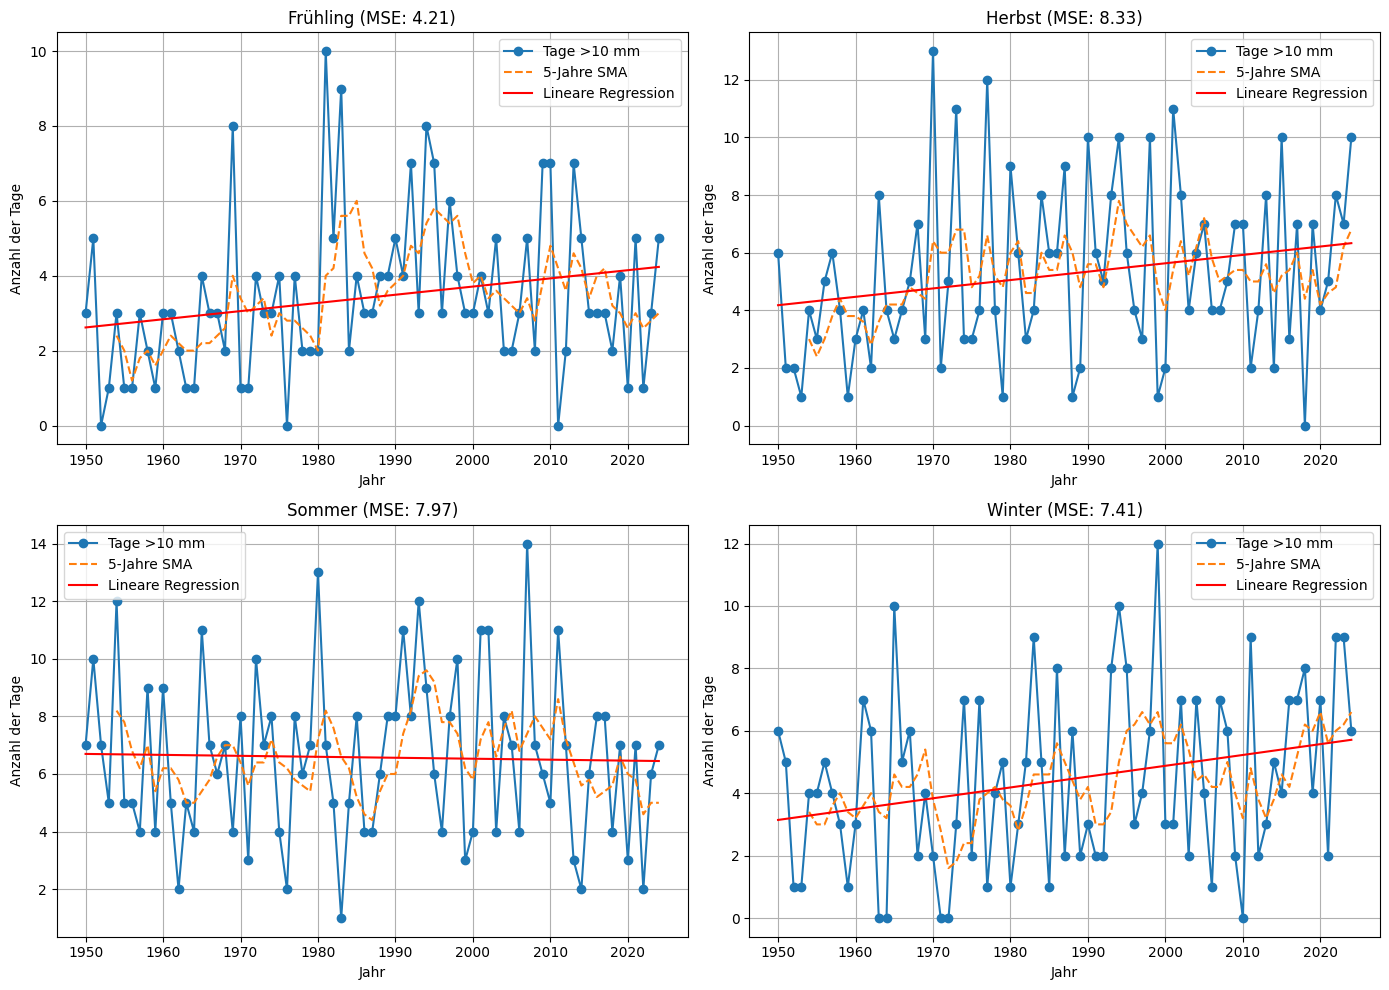

In [6]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Finde Tage mit mehr als 10 mm Niederschlag
    data['heavy_rain'] = data['prcp'] > 10
    
    # Definiere die Jahreszeiten
    data['season'] = data.index.month % 12 // 3 + 1  # 1=Winter, 2=Frühling, 3=Sommer, 4=Herbst
    # Optional: explizite Benennungen
    season_names = {1: 'Winter', 2: 'Frühling', 3: 'Sommer', 4: 'Herbst'}
    data['season_name'] = data['season'].map(season_names)

    # Aggregiere die Anzahl der Tage pro Jahr und Saison
    heavy_rain_days_per_season = data.groupby([data.index.year, 'season_name']).sum(numeric_only=True)['heavy_rain'].unstack()

    # Plot für jede Jahreszeit separat
    plt.figure(figsize=(14, 10))
    
    for i, season in enumerate(heavy_rain_days_per_season.columns, start=1):
        ax = plt.subplot(2, 2, i)
        
        # Original und gleitende Durchschnitte
        heavy_rain_season = heavy_rain_days_per_season[season]
        heavy_rain_season_ma = heavy_rain_season.rolling(window=5).mean()
        heavy_rain_season_ema = heavy_rain_season.ewm(span=5).mean()
        
        # Gewichteter Durchschnitt
        weights = np.arange(1, 6)
        heavy_rain_season_weighted_avg = heavy_rain_season.rolling(window=5).apply(
            lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), 
            raw=True
        )

        # Lineare Regression
        years = heavy_rain_days_per_season.index.get_level_values(0).values.reshape(-1, 1)
        values = heavy_rain_season.values

        model = LinearRegression()
        model.fit(years, values)
        trend_line = model.predict(years)
        
        # Berechne den MSE
        mse = mean_squared_error(values, trend_line)
        print(f'MSE für {season}: {mse:.2f}')
        
        # Plot
        ax.plot(heavy_rain_days_per_season.index.get_level_values(0), heavy_rain_season, marker='o', linestyle='-', label='Tage >10 mm')
        ax.plot(heavy_rain_days_per_season.index.get_level_values(0), heavy_rain_season_ma, linestyle='--', label='5-Jahre SMA')
        ax.plot(heavy_rain_days_per_season.index.get_level_values(0), trend_line, linestyle='-', color='red', label='Lineare Regression')
        
        ax.set_title(f'{season} (MSE: {mse:.2f})')
        ax.set_xlabel('Jahr')
        ax.set_ylabel('Anzahl der Tage')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()